<a href="https://colab.research.google.com/github/AlexKressner/Statistik/blob/main/Wahrscheinlichkeitsrechnung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
number_of_trials = 100000
heads = 0
tails = 0
ratio = []
p = 0.5

In [23]:
for trial in range(1,number_of_trials+1):
  result = bernoulli.rvs(p)
  if result == 1:
    heads +=1
  else:
    tails +=1
  ratio.append([trial,heads/trial])

In [24]:
heads, tails

(50257, 49743)

In [25]:
y = [point[1] for point in ratio]
x = [point[0] for point in ratio]

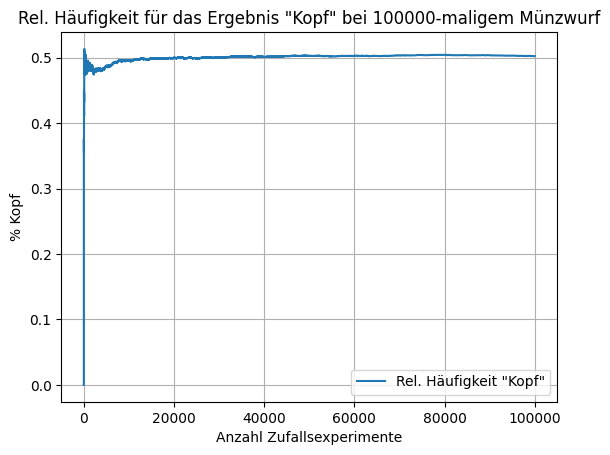

In [26]:
# Plot the line
plt.plot(x, y, label='Rel. Häufigkeit "Kopf"')

# Add title and labels to the axes
plt.title(f'Rel. Häufigkeit für das Ergebnis "Kopf" bei {number_of_trials}-maligem Münzwurf')
plt.xlabel("Anzahl Zufallsexperimente")
plt.ylabel("% Kopf")

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Anzahl der Stichproben und Fehlerwahrscheinlichkeit

In [27]:
trials = range(0,79)

In [28]:
p = []
prob=[]
for trial in trials:
  p.append((68-trial)/(80-trial))
  prob.append([trial+1,np.prod(p)])

In [29]:
x = pd.DataFrame(prob, columns=["Trial","Irrtumswahrscheinlichkeit"])
x

,Trial,Irrtumswahrscheinlichkeit
0,1,0.850000
1,2,0.720886
2,3,0.609981
3,4,0.514919
4,5,0.433616
...,...,...
74,75,0.000000
75,76,-0.000000
76,77,0.000000
77,78,-0.000000


<Axes: xlabel='Trial'>

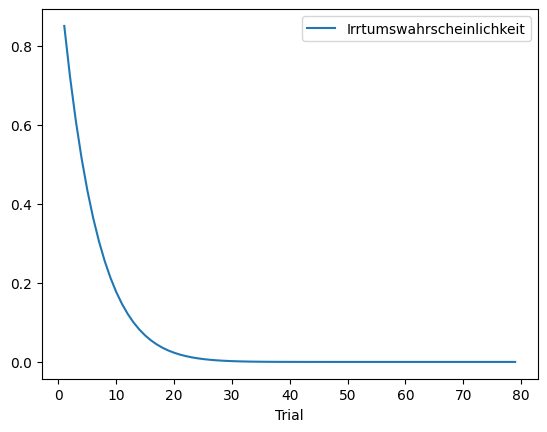

In [30]:
x.plot(x="Trial", y="Irrtumswahrscheinlichkeit", kind="line")

## Binomialverteilung

In [31]:
import scipy
import numpy as np

### Beispiel "Münzwurf"

In [32]:
N=10 # Anzahl der Experimente
k=4 # Anzahl Erfolge (Kopf)
p=0.5 # Erfolgswahrscheinlichkeit

In [33]:
scipy.stats.binom.pmf(k,N,p)

0.2050781249999999

In [34]:
np.sum(scipy.stats.binom.pmf(0,N,p)+scipy.stats.binom.pmf(1,N,p)+scipy.stats.binom.pmf(2,N,p)+scipy.stats.binom.pmf(3,N,p)+scipy.stats.binom.pmf(4,N,p))

0.37695312499999994

In [35]:
scipy.stats.binom.cdf(k,N,p)

0.376953125

In [36]:
l = []
for k in range(N+1):
  l.append([k,scipy.stats.binom.pmf(k,N,p)])

In [40]:
l

[[0, 0.0009765624999999989],
 [1, 0.009765625000000002],
 [2, 0.04394531250000004],
 [3, 0.1171875],
 [4, 0.2050781249999999],
 [5, 0.24609375000000003],
 [6, 0.2050781249999999],
 [7, 0.11718749999999999],
 [8, 0.04394531250000004],
 [9, 0.009765625000000002],
 [10, 0.0009765625]]

In [37]:
x = pd.DataFrame(l, columns=["k","Wahrscheinlichkeit"])

<Axes: xlabel='k'>

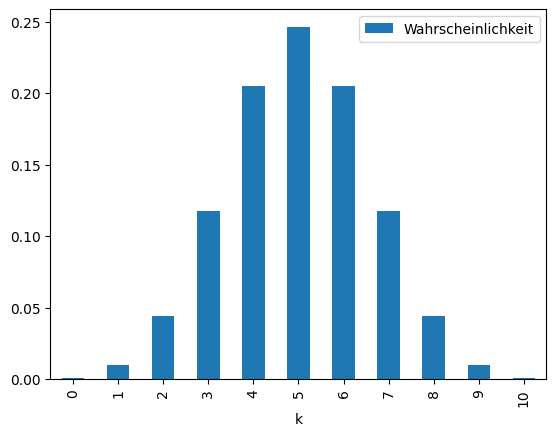

In [39]:
x.plot(x="k", y="Wahrscheinlichkeit", kind="bar")

### Beispiel Flugzeugmotor

In [59]:
N=4 # Anzahl Motoren
p=0.95 # Erfolgswahrscheinlichkeit

In [60]:
scipy.stats.binom.pmf(2,N,p)+scipy.stats.binom.pmf(3,N,p)+scipy.stats.binom.pmf(4,N,p)

0.9995187500000002

In [61]:
probs = []

In [62]:
for p in range(1,100):
  prob = p/100
  prob = np.sum(scipy.stats.binom.pmf(2,N,prob)+scipy.stats.binom.pmf(3,N,prob)+scipy.stats.binom.pmf(4,N,prob))
  probs.append([p, prob])


In [63]:
x = pd.DataFrame(probs, columns=["k","Wahrscheinlichkeit"])

<Axes: xlabel='k'>

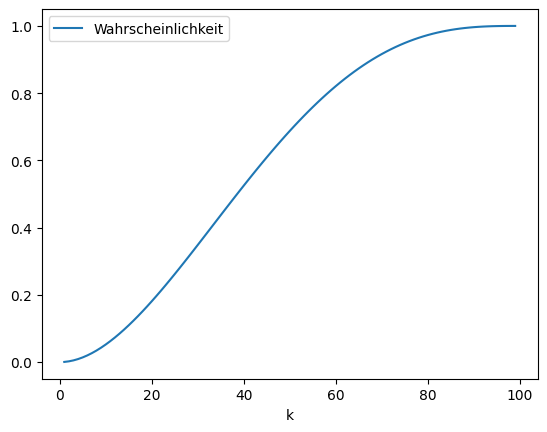

In [65]:
x.plot(x="k", y="Wahrscheinlichkeit", kind="line")

### Multinomialverteilung

In [68]:
scipy.stats.multinomial.pmf([3,2,3,2],10,[0.2,0.2,0.2,0.4])

0.010321920000000021